## Estudo Dirigido: Roubos e Furtos de veículos no estado de São Paulo em 2016/2017

#### Autor: Ramon de Carvalho Nogueira 
#### LinkedIn: https://www.linkedin.com/in/ramonrcn/
#### E-Mail: ramon_rcn@hotmail.com
#### Data de início: 14/02/2018
#### Dados públicos obtidos em http://www.ssp.sp.gov.br/transparenciassp/


# Este estudo tem como objetivos:
    - Exibir de forma objetiva e rápida os dados coletados pela SSP.
    - Responder as seguintes questões:
        - Quais os veículos mais visados?
        - Quais os veículos menos visados?
        - Total de ocorrências para cada modelo.
        - Total de ocorrências por localidade.
        - Cidades com o maior número de ocorrências.
        - Quais as regiões com maior índice de ocorrências?
        - Verificar mês a mês o número de Furtos x Roubos para carros e motos

#### Além de satifazer algumas curiosidades pessoais:
    - Existe uma cor 'preferida' pelos bandidos na hora de levar seu carro?
    - São carros mais novos ou mais velhos?
    Entre outras que irão surgindo durante o processo e que serão destacadas durante o Notebook.
    


# Tratando dos roubos de 2016

Mas antes, vamos deixar claro o que é um Furto e o que é um Roubo.

#### Furto:
    O furto é caracterizado pela tomada de um bem material, sem que haja violência ou ameaça contra a vítima
    Lei: Art. 155.
    Vítima: Não está presente, ou não percebe a ação.

#### Roubo:
    O roubo consiste em um ato de subtrair um bem material de outrem por meio de violência ou ameaça.
    Lei: Art. 157.
    Vítima: A pessoa está presente, e sofre ameaça ou é alvo de violência. 
Fonte: https://www.diferenca.com/furto-e-roubo/

In [2]:
#import das bibliotecas

import pandas as pd
import numpy as np


In [4]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Roubos_2016.txt'
Roubos2016 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO"])

#Retirando a coluna ID que utilizei para montar o consolidado dos roubos de 2016
#A coluna DATAELABORACAO foi eliminada quando juntei todos os arquivos em um só, já de acordo com o padrão definido em Furtos
Roubos2016.drop(['ID'], axis=1, inplace=True)
Roubos2016.head(5)


,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EEG0954,SP,S.PAULO,Dourada,HONDA/FIT EX,2008.0,2008.0,AUTOMOVEL
1,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EUX4032,SP,S.PAULO,Cinza,RENAULT/LOGAN EXP 1016V,2013.0,2013.0,AUTOMOVEL
2,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Roubo (art. 157) - VEICULO,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Roubo (art. 157) - VEICULO,Consumado,EEG0954,SP,S.PAULO,Dourada,HONDA/FIT EX,2008.0,2008.0,AUTOMOVEL
4,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Roubo (art. 157) - VEICULO,Consumado,EUX4032,SP,S.PAULO,Cinza,RENAULT/LOGAN EXP 1016V,2013.0,2013.0,AUTOMOVEL


In [5]:
#Pré análise
Roubos2016.describe(include=['object'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,193788,193788,193788,173370,161128,173370,173370,173235,173235,193788,...,193788,193788,193788,193785,137736,138515,138385,138496,138225,138225
unique,5,3,2,32671,7617,414,2,66479,66485,29,...,797,28,205,2,89706,26,1312,16,4196,21
top,A NOITE,Desconhecida,Não,AVENIDA SAPOPEMBA,CENTRO,S.PAULO,SP,"-24,015,896,895","-464,621,344,129,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Preta,HONDA/CB 300R,AUTOMOVEL
freq,82357,149545,166235,771,4384,81459,173366,335,335,147495,...,5070,137356,118638,192861,78,130823,58211,33335,1885,74573


#### Pontos a serem considerados:
    Placa -> XXX0000
    Carro mais roubado em 2016: CB 300R preta. não, pera... (/ironia)


In [6]:
#Identificando as placas que mais se repetem
Roubos2016['PLACA_VEICULO'].value_counts().head()

XXX0000    78
OOO0000    37
AAA0000    28
FLH5803    24
FJD1613    24
Name: PLACA_VEICULO, dtype: int64

In [6]:
#Visualizando os registros com placas 'inexistentes'
for i,l in Roubos2016.iterrows():
    if l.PLACA_VEICULO == 'XXX0000' or l.PLACA_VEICULO == 'OOO0000' or l.PLACA_VEICULO == 'AAA0000':
        print(i, l.DATAOCORRENCIA,' ',l.DELEGACIA_NOME,' ',l.PLACA_VEICULO,' ',l.UF_VEICULO,' ',
                  l.CIDADE_VEICULO,' ',l.DESCR_TIPO_VEICULO,' ',l.DESCR_MARCA_VEICULO,' ',l.ANO_FABRICACAO )

1977 2016-02-16 00:00:00   50º D.P. ITAIM PAULISTA   OOO0000   SP   GUARULHOS   MOTOCICLO   HONDA/CG 150 TITAN ESD   2008.0
1979 2016-02-16 00:00:00   50º D.P. ITAIM PAULISTA   OOO0000   SP   GUARULHOS   MOTOCICLO   HONDA/CG 150 TITAN ESD   2008.0
1981 2016-02-16 00:00:00   50º D.P. ITAIM PAULISTA   OOO0000   SP   GUARULHOS   MOTOCICLO   HONDA/CG 150 TITAN ESD   2008.0
6724 2016-01-24 00:00:00   DEL.POL.ITATIBA   AAA0000   SP   S.PAULO   INEXIST.   M.A./CATERPILLAR   0.0
10910 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
10914 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
10918 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
10922 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
18353 2016-04-02 00:00:00   47º D.P. CAPAO REDONDO   XXX0000   SP   

121455 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 125   nan
121456 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   HONDA/CB 250F TWISTER   nan
121459 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 125   nan
121460 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   HONDA/CB 250F TWISTER   nan
121463 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 125   nan
121464 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   HONDA/CB 250F TWISTER   nan
121467 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 125   nan
121468 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   HONDA/CB 250F TWISTER   nan
121471 2016-05-29 00:00:00   63º D.P. VILA JACUI   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 1

In [7]:
#Dropando registros com valores inválidos
data = []

for i,l in Roubos2016.iterrows():
    if l.PLACA_VEICULO == 'XXX0000' or l.PLACA_VEICULO == 'OOO0000' or l.PLACA_VEICULO == 'AAA0000':
        data.append(i)

Roubos2016.drop(data, axis=0, inplace=True)
Roubos2016['PLACA_VEICULO'].value_counts().head()

FJD1613    24
FLH5803    24
FQB0386    19
DDA3096    19
DIQ7523    19
Name: PLACA_VEICULO, dtype: int64

In [8]:
#Verificando registros com a coluna PLACA_VEICULO em branco
Roubos2016['PLACA_VEICULO'].isnull().value_counts()

False    137593
True      56052
Name: PLACA_VEICULO, dtype: int64

In [9]:
#Dropando os registros de veículos com a placa em branco
Roubos2016.dropna(subset=['PLACA_VEICULO'], axis = 0, inplace = True)
Roubos2016['PLACA_VEICULO'].isnull().value_counts()

False    137593
Name: PLACA_VEICULO, dtype: int64

#### Aplicando Filtros.
    Analisando o arquivo no Excel, entendi o porquê de tantos registros em duplicidade, principalmente na coluna 'PLACA_VEICULO'
    
    No exemplo abaixo, os registros selecionados mostram o Furto do veículo e a localização do mesmo.
    Logo, é normal do dataset registros em duplicidade, e a filtragem pela placa do veículo não é eficaz.
    
    Portanto, irei tratar as informações tendo como base as colunas 'ESPECIE' e 'RUBRICA', o que irá possibilitar manipular com maior precisão as informações do dataset

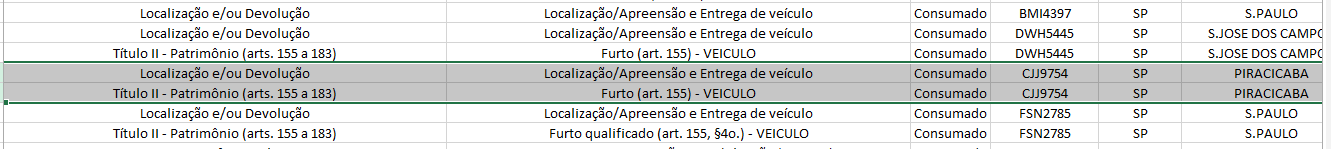

In [11]:
#Observando as 'espécies' de crimes
Roubos2016['ESPECIE'].value_counts().head(10)

Título II - Patrimônio (arts. 155 a 183)                 106312
Localização e/ou Devolução                                21549
Ato infracional                                            4592
Título I - Pessoa (arts. 121 a 154)                         806
L 8069/90 - ECA                                             760
Acidente de trânsito                                        561
Título IX - Paz pública (arts. 286 a 288)                   539
Título XI - Administração pública (arts. 312 a 359-H)       451
L 9503/97 - Código de Trânsito Brasileiro                   439
L 10826/03 - Estatuto do Desarmamento                       419
Name: ESPECIE, dtype: int64

In [10]:
#Verificando se existe registro com a coluna ESPECIE vazia, para então poder utiliza-la como filtro
Roubos2016['ESPECIE'].isnull().value_counts()

False    137593
Name: ESPECIE, dtype: int64

##### Separando em um novo DF todos os veículos Localizados e/ou Devolvidos em 2016

In [11]:
#Utilizando a notação 'List Comprehention' para selecionar apenas os registros com 'Localização e/ou Devolução'
Roubolocdev2016 = Roubos2016[(Roubos2016.ESPECIE == 'Localização e/ou Devolução')]

Roubolocdev2016.head() 

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
19,2016,99,2016-07-01 14:36:48,2016-07-01 17:03:47,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA CANANÉIA,...,Localização/Apreensão e Entrega de veículo,Consumado,GWO3585,SP,VARZEA PAULISTA,Vermelho,FIAT/PALIO WEEKEND,1998.0,1998.0,AUTOMOVEL
25,2016,50,2016-07-01 16:52:53,2016-07-01 17:16:58,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,AVENIDA SARGENTO IRACITAN COIMBRA,...,Localização/Apreensão e Entrega de veículo,Consumado,FUR6162,SP,S.PAULO,Preta,FIAT/STRADA ADVENTURE CD,2014.0,2015.0,CAMINHONETE
35,2016,64,2016-07-01 17:03:54,2016-07-01 17:30:12,2016-05-01,A NOITE,2016-07-01,Desconhecida,Não,AVENIDA NORDESTINA,...,Localização/Apreensão e Entrega de veículo,Consumado,EVB2879,SP,S.PAULO,Preta,I/KIA SOUL EX 1.6 FF MT,2011.0,2012.0,CAMIONETA
40,2016,14,2016-07-01 17:19:08,2016-07-01 17:42:47,2016-06-01,A NOITE,2016-07-01,Desconhecida,Não,NaN,...,Localização/Apreensão e Entrega de veículo,Consumado,FTJ2518,SP,S.PAULO,Preta,RENAULT/LOGAN AUTH 1016V,2014.0,2015.0,AUTOMOVEL
48,2016,43,2016-07-01 17:24:06,2016-07-01 17:54:58,2016-07-01,A TARDE,2016-07-01,Desconhecida,Não,RODOVIA SP 270,...,Localização/Apreensão e Entrega de veículo,Consumado,DGY1502,SP,S.PAULO,Branco,DAFRA/RIVA 150 CARGO,2013.0,2013.0,MOTOCICLO


In [12]:
#Checando por registros duplicados filtrando pela placa do veículo
Roubolocdev2016['PLACA_VEICULO'].value_counts().head()

FIN3781    6
FDL1178    6
EWR4378    6
FMW2971    5
FBP7608    5
Name: PLACA_VEICULO, dtype: int64

In [13]:
#Limpando os registros duplicados filtrando pela placa
Roubolocdev2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)
Roubolocdev2016['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


EZA1432    1
ECO0845    1
FEE7426    1
FKE2658    1
FGH3505    1
Name: PLACA_VEICULO, dtype: int64

In [14]:
#Salvando os registros de veículos localizados e devolvidos para análise à parte em outro notebook
Roubolocdev2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Roubolocdev2016.csv')

 Com os veículos Localizados e/ou Devolvidos armazenados em um set à parte, irei assumir cada placa como única no Dataset principal
    

In [15]:
Roubos2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)

In [16]:
Roubos2016.describe(include=['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,89703,89703,89703,82521,75550,82521,82521,82484,82484,89703,...,89703,89703,89703,89703,89703,89703,89632,89702,89515,89515
unique,5,3,2,31865,7442,409,2,63208,63209,29,...,792,23,139,2,89703,26,1305,16,4127,20
top,A NOITE,Desconhecida,Não,AVENIDA SAPOPEMBA,CENTRO,S.PAULO,SP,"-236,104,715,079,999","-464,404,207,009,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,OCZ2517,SP,S.PAULO,Preta,HONDA/CB 300R,AUTOMOVEL
freq,41922,81879,85246,338,2128,39038,82520,171,171,66143,...,2211,70724,65215,89623,1,85052,38480,22741,1292,49094


###### Agora, tratando os valores em branco

In [17]:
#Identificando todos os campos em branco
branco = Roubos2016.isnull()
branco.head(5)

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Exibindo coluna a coluna os registros em branco
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print("")


ANO_BO
False    89703
Name: ANO_BO, dtype: int64

NUM_BO
False    89703
Name: NUM_BO, dtype: int64

BO_INICIADO
False    89703
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    89703
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    89703
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    89703
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    89703
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    89703
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    89703
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    82521
True      7182
Name: LOGRADOURO, dtype: int64

NUMERO
False    89683
True        20
Name: NUMERO, dtype: int64

BAIRRO
False    75550
True     14153
Name: BAIRRO, dtype: int64

CIDADE
False    82521
True      7182
Name: CIDADE, dtype: int64

UF
False    82521
True      7182
Name: UF, dtype: int64

LATITUDE
False    82484
True      7219
Name: LATITUDE, dtype: int64

LONGITUDE
False    82484
True      7219
Name: LONGITUDE, dtype: int64


In [21]:
#Deletando registros em branco de algumas colunas
Roubos2016.dropna(subset = ['LATITUDE','BAIRRO','UF_VEICULO','CIDADE_VEICULO','ANO_FABRICACAO',
                            'UF','DESCR_MARCA_VEICULO','DESCR_COR_VEICULO','ANO_MODELO'], axis = 0, inplace = True)

In [22]:
#Novo panorama de valores em branco
branco = Roubos2016.isnull()

for coluna in branco.columns.values.tolist():
    print(coluna)
    print(branco[coluna].value_counts())
    print('')

ANO_BO
False    75223
Name: ANO_BO, dtype: int64

NUM_BO
False    75223
Name: NUM_BO, dtype: int64

BO_INICIADO
False    75223
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    75223
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    75223
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    75223
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    75223
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    75223
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    75223
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    75223
Name: LOGRADOURO, dtype: int64

NUMERO
False    75223
Name: NUMERO, dtype: int64

BAIRRO
False    75223
Name: BAIRRO, dtype: int64

CIDADE
False    75223
Name: CIDADE, dtype: int64

UF
False    75223
Name: UF, dtype: int64

LATITUDE
False    75223
Name: LATITUDE, dtype: int64

LONGITUDE
False    75223
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    75223
Name: DESCRICAOLOCAL, dtype: int64

EXAME
True     65902
False     9321
Na

In [23]:
#Tipando as colunas como inteiro
Roubos2016['ANO_MODELO'] = Roubos2016.ANO_MODELO.astype(int)
Roubos2016['ANO_FABRICACAO'] = Roubos2016.ANO_FABRICACAO.astype(int)
Roubos2016['NUMERO'] = Roubos2016.NUMERO.astype(int)
Roubos2016.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EEG0954,SP,S.PAULO,Dourada,HONDA/FIT EX,2008,2008,AUTOMOVEL
1,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EUX4032,SP,S.PAULO,Cinza,RENAULT/LOGAN EXP 1016V,2013,2013,AUTOMOVEL
15,2016,99,2016-07-01 14:36:48,2016-07-01 17:03:47,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA CANANÉIA,...,A.I.-Roubo (art. 157) - VEICULO,Consumado,GWO3585,SP,VARZEA PAULISTA,Vermelho,FIAT/PALIO WEEKEND,1998,1998,AUTOMOVEL
23,2016,28034,2016-07-01 17:11:19,2016-07-01 17:11:19,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,RUA BEATRIZ BICUDO,...,Roubo (art. 157) - VEICULO,Consumado,DOD6997,SP,AMERICANA,Preta,I/DODGE JOURNEY SXT,2008,2008,CAMIONETA
25,2016,50,2016-07-01 16:52:53,2016-07-01 17:16:58,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,AVENIDA SARGENTO IRACITAN COIMBRA,...,Localização/Apreensão e Entrega de veículo,Consumado,FUR6162,SP,S.PAULO,Preta,FIAT/STRADA ADVENTURE CD,2014,2015,CAMINHONETE


In [24]:
#Salvando o DF como .csv para uma análise mais detalhada
Roubos2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Roubos2016_v1.csv')

## Tratando os dados de Roubos de 2017

In [26]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Roubos_2017.txt'
Roubos2017 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO"])

#Retirando a coluna ID que utilizei para montar o consolidado dos roubos de 2016
#A coluna DATAELABORACAO foi eliminada quando juntei todos os arquivos em um só, já de acordo com o padrão definido em Furtos
Roubos2017.drop(['ID'], axis=1, inplace=True)
Roubos2017.head(5)


,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2017,687,2017-03-02 09:11:22,2017-03-02 12:15:53,2017-03-02,PELA MANHÃ,2017-03-02,Conhecida,Sim,RUA DOS CUNHA,...,Roubo (art. 157) - VEICULO,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2017,687,2017-03-02 09:11:22,2017-03-02 12:15:53,2017-03-02,PELA MANHÃ,2017-03-02,Conhecida,Sim,RUA DOS CUNHA,...,Roubo (art. 157) - VEICULO,Consumado,FYB8404,SP,PERUIBE,Branco,FORD/ECOSPORT SE AT 1.6B,2016.0,2017.0,CAMIONETA
2,2017,644,2017-03-02 12:14:06,2017-03-02 12:16:42,2016-10-12,A NOITE,2017-03-02,Desconhecida,Não,NaN,...,Roubo (art. 157) - RESIDENCIA,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,2017,644,2017-03-02 12:14:06,2017-03-02 12:16:42,2016-10-12,A NOITE,2017-03-02,Desconhecida,Não,NaN,...,Roubo (art. 157) - RESIDENCIA,Consumado,DPM6465,SP,S.JOSE DOS CAMPOS,Cinza,FIAT/DOBLO ADVENTURE,2004.0,2005.0,CAMIONETA
4,2017,644,2017-03-02 12:14:06,2017-03-02 12:16:42,2016-10-12,A NOITE,2017-03-02,Desconhecida,Não,NaN,...,Roubo (art. 157) - VEICULO,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


### Análise preliminar dos dados

In [27]:

Roubos2017.describe(include = ['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,172872,172872,172872,155655,147201,155655,155655,155565,155565,172872,...,172872,172872,172872,172868,121995,122638,122521,122638,122505,122505
unique,5,3,2,29820,6291,428,1,58281,58284,26,...,810,31,198,2,78457,27,1284,16,4176,19
top,A NOITE,Desconhecida,Não,RODOVIA PRESIDENTE DUTRA (BR 116),CENTRO,S.PAULO,SP,"-236,104,715,079,999","-464,404,207,009,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Branco,HYUNDAI/HB20 1.0M COMFOR,AUTOMOVEL
freq,71468,132263,146277,1074,4416,72038,155655,480,480,134959,...,4279,121209,104333,172019,87,113963,50623,29192,1364,66452


#### Pontos a serem considerados:
    Placas -> XXX0000
    Carro mais roubado em 2017: HB20 Manual branco (/ironia)


In [28]:
#Verificando se existe mais algum registro 'coringa'
Roubos2017['PLACA_VEICULO'].value_counts().head()

XXX0000    87
OOO0000    23
CWP1730    18
EHA5928    18
DSJ0345    16
Name: PLACA_VEICULO, dtype: int64

In [29]:
#Dropando registros com valores inválidos
data = []

for i,l in Roubos2017.iterrows():
    if l.PLACA_VEICULO == 'XXX0000' or l.PLACA_VEICULO == 'OOO0000':
        data.append(i)

Roubos2017.drop(data, axis=0, inplace=True)
Roubos2017['PLACA_VEICULO'].value_counts().head()

EHA5928    18
CWP1730    18
DSJ0345    16
DDT7949    16
DUT3390    15
Name: PLACA_VEICULO, dtype: int64

In [30]:
Roubos2017['PLACA_VEICULO'].isnull().value_counts()

False    121885
True      50877
Name: PLACA_VEICULO, dtype: int64

In [32]:
Roubos2017.dropna(subset = ['PLACA_VEICULO'], axis = 0, inplace = True)
Roubos2017['PLACA_VEICULO'].isnull().value_counts()

False    121885
Name: PLACA_VEICULO, dtype: int64

In [33]:
#Filtrando os veículos encontrados e/ou devolvidos

Roubolocdev2017 = Roubos2017[(Roubos2017.ESPECIE == 'Localização e/ou Devolução')]

Roubolocdev2017.head() 

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
10,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009.0,2009.0,AUTOMOVEL
14,2017,449,2017-03-02 12:21:37,2017-03-02 12:40:56,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA PADRE DONIZETE,...,Localização/Apreensão e Entrega de veículo,Consumado,ERC0305,SP,S.ANDRE,Cinza,FIAT/STRADA ADVENTURE CD,2011.0,2011.0,CAMINHONETE
24,2017,591,2017-03-02 12:39:02,2017-03-02 12:47:59,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,RUA DAS MONÇÕES,...,Localização/Apreensão e Entrega de veículo,Consumado,BPS3450,SP,S.ANDRE,Preta,JTA/SUZUKI BANDIT 650,2007.0,2008.0,MOTOCICLO
28,2017,280,2017-03-02 12:19:40,2017-03-02 12:56:33,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,AVENIDA ALBERTO SANTOS DUMONT,...,Localização/Apreensão e Entrega de veículo,Consumado,EFU3628,SP,OSASCO,Prata,I/M.BENZ313CDI SPRINTERM,2010.0,2010.0,MICRO-ONIBUS
33,2017,532,2017-03-02 12:55:37,2017-03-02 13:02:59,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,AVENIDA DOUTOR VITAL BRASIL,...,Localização/Apreensão e Entrega de veículo,Consumado,ETS9820,SP,DIADEMA,Prata,I/HYUNDAI I30 2.0,2010.0,2011.0,AUTOMOVEL


In [34]:
#Checando por registros duplicados filtrando pela placa do veículo
Roubolocdev2017['PLACA_VEICULO'].value_counts().head()

FEJ0059    6
IMM1648    6
GFY5909    6
FEH1733    5
EQM2520    5
Name: PLACA_VEICULO, dtype: int64

In [35]:
#Limpando os registros duplicados filtrando pela placa
Roubolocdev2017.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)
Roubolocdev2017['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


GHC7676    1
DXD5467    1
FNO4800    1
FQY0089    1
BYA8026    1
Name: PLACA_VEICULO, dtype: int64

In [36]:
#Salvando os registros de veículos localizados e devolvidos para análise à parte em outro notebook
Roubolocdev2017.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Roubolocdev2017.csv')

In [38]:
#Identificando todos os campos em branco no dataset principal
branco = Roubos2017.isnull()
branco.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
#Exibindo coluna a coluna os registros em branco
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print("")


ANO_BO
False    121885
Name: ANO_BO, dtype: int64

NUM_BO
False    121885
Name: NUM_BO, dtype: int64

BO_INICIADO
False    121885
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    121885
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    121885
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    121885
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    121885
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    121885
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    121885
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    110827
True      11058
Name: LOGRADOURO, dtype: int64

NUMERO
False    121828
True         57
Name: NUMERO, dtype: int64

BAIRRO
False    104184
True      17701
Name: BAIRRO, dtype: int64

CIDADE
False    110827
True      11058
Name: CIDADE, dtype: int64

UF
False    110827
True      11058
Name: UF, dtype: int64

LATITUDE
False    110739
True      11146
Name: LATITUDE, dtype: int64

LONGITUDE
False    110739
True      11146
Name: L

In [42]:
#Deletando registros em branco de algumas colunas
Roubos2017.dropna(subset = ['LATITUDE','BAIRRO','UF_VEICULO','STATUS','CIDADE_VEICULO','ANO_FABRICACAO',
                            'UF','DESCR_MARCA_VEICULO','ANO_MODELO'], axis = 0, inplace = True)

In [43]:
#Novo panorama de valores em branco
branco = Roubos2017.isnull()

for coluna in branco.columns.values.tolist():
    print(coluna)
    print(branco[coluna].value_counts())
    print('')

ANO_BO
False    103838
Name: ANO_BO, dtype: int64

NUM_BO
False    103838
Name: NUM_BO, dtype: int64

BO_INICIADO
False    103838
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    103838
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    103838
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    103838
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    103838
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    103838
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    103838
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    103838
Name: LOGRADOURO, dtype: int64

NUMERO
False    103838
Name: NUMERO, dtype: int64

BAIRRO
False    103838
Name: BAIRRO, dtype: int64

CIDADE
False    103838
Name: CIDADE, dtype: int64

UF
False    103838
Name: UF, dtype: int64

LATITUDE
False    103838
Name: LATITUDE, dtype: int64

LONGITUDE
False    103838
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    103838
Name: DESCRICAOLOCAL, dtype: int64

EXAME
True     78655


In [44]:
#Tipando as colunas como inteiro
Roubos2017['ANO_MODELO'] = Roubos2017.ANO_MODELO.astype(int)
Roubos2017['ANO_FABRICACAO'] = Roubos2017.ANO_FABRICACAO.astype(int)
Roubos2017['NUMERO'] = Roubos2017.NUMERO.astype(int)
Roubos2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2017,687,2017-03-02 09:11:22,2017-03-02 12:15:53,2017-03-02,PELA MANHÃ,2017-03-02,Conhecida,Sim,RUA DOS CUNHA,...,Roubo (art. 157) - VEICULO,Consumado,FYB8404,SP,PERUIBE,Branco,FORD/ECOSPORT SE AT 1.6B,2016,2017,CAMIONETA
6,2017,309,2017-03-02 12:17:12,2017-03-02 12:22:22,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,ESTRADA DO ELENCO,...,Roubo (art. 157) - VEICULO,Consumado,DOQ9769,SP,S.PAULO,Prata,HONDA/CG 150 TITAN ES,2005,2006,MOTOCICLO
8,2017,1198,2017-03-02 12:12:53,2017-03-02 12:32:34,2017-03-02,PELA MANHÃ,2017-03-02,Desconhecida,Não,RUA SANTA MERCEDES,...,Roubo (art. 157) - VEICULO,Consumado,EZB5520,SP,S.PAULO,Branco,FIAT/FIORINO FLEX,2011,2012,CAMINHONETE
10,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009,2009,AUTOMOVEL
12,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Roubo (art. 157) - VEICULO,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009,2009,AUTOMOVEL


In [45]:
#Salvando o DF como .csv para uma análise mais detalhada
Roubos2017.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Roubos2017_v1.csv')